In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_gaussian_value(min_num, max_num, media, std_dev):
    while True:
        val = random.gauss(media, std_dev)
        if val>=min_num and val<=max_num:
            return val

In [3]:
def data_generator():
    rows = []
    for i in range(10000):
        row_dict = {}
        
        row_dict['embalaje'] = random.choice(['A', 'B', 'C'])
        row_dict['largo'] = get_gaussian_value(5, 100, 50, 15)
        row_dict['ancho'] = get_gaussian_value(5, 100, 50, 15)
        row_dict['alto'] = get_gaussian_value(5, 100, 50, 15)
        row_dict['peso'] = get_gaussian_value(1, 50, 25, 5)
        row_dict['procedencia'] = random.choice(['A', 'B', 'C', 'D'])
        
        # 20% es refrigerado
        if random.random() <= 0.2:
            row_dict['temperatura'] = 'refrigerado'
        else:
            row_dict['temperatura'] = 'ambiente'
            
        # 20% es fragil independientemente de la temperatura
        if random.random() <= 0.2:
            row_dict['manipulacion'] = 'fragil'
        else:
            # si la temperatura es refrigerado entonces la manipulacion es fragil
            if row_dict['temperatura'] == 'refrigerado':
                row_dict['manipulacion'] = 'fragil'
            else:
                row_dict['manipulacion'] = 'normal'
            
        
        
        # etiquetado del protocolo
        volumen = row_dict['largo'] * row_dict['ancho'] * row_dict['alto']
        if volumen <= 3375 or row_dict['manipulacion'] == 'fragil':
            row_dict['protocolo'] = 'protocolo_1'
        else:
            row_dict['protocolo'] = 'protocolo_2'

        
        
        rows.append(row_dict)
        
    return rows

data_dict = data_generator()

In [4]:
df = pd.DataFrame.from_records(data_dict)
df

,embalaje,largo,ancho,alto,peso,procedencia,temperatura,manipulacion,protocolo
0,A,34.687708,51.459835,42.095164,23.857571,D,refrigerado,fragil,protocolo_1
1,A,49.464008,50.378068,38.858520,32.119336,A,ambiente,normal,protocolo_2
2,B,66.617850,52.215517,27.181471,23.359145,C,ambiente,fragil,protocolo_1
3,C,24.215506,41.945443,51.965421,20.012881,C,ambiente,normal,protocolo_2
4,C,56.804813,60.880069,56.895350,23.560809,C,ambiente,normal,protocolo_2
...,...,...,...,...,...,...,...,...,...
9995,A,60.906016,52.911421,24.009152,20.668354,C,ambiente,normal,protocolo_2
9996,C,50.839682,53.362869,49.981335,19.933259,C,ambiente,normal,protocolo_2
9997,B,64.661100,67.924710,37.296223,18.554790,D,ambiente,fragil,protocolo_1
9998,B,42.017064,72.635800,61.344982,31.943001,D,ambiente,normal,protocolo_2


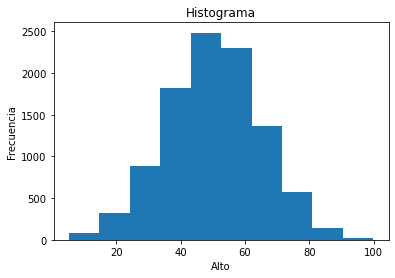

In [5]:
arr = np.array(df['alto'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Alto')
plt.title('Histograma')
plt.show()


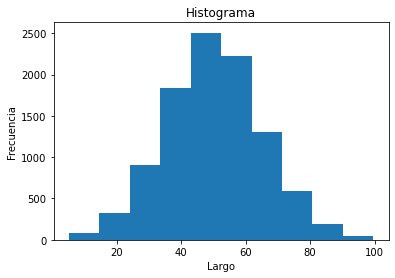

In [6]:
arr = np.array(df['largo'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Largo')
plt.title('Histograma')
plt.show()

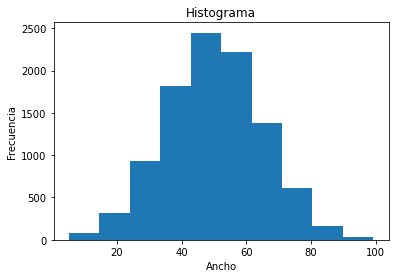

In [7]:
arr = np.array(df['ancho'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Ancho')
plt.title('Histograma')
plt.show()

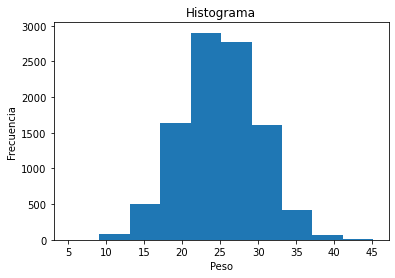

In [8]:
arr = np.array(df['peso'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Peso')
plt.title('Histograma')
plt.show()

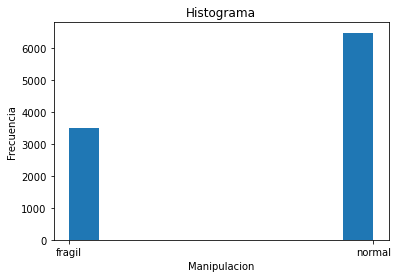

In [9]:
arr = np.array(df['manipulacion'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Manipulacion')
plt.title('Histograma')
plt.show()

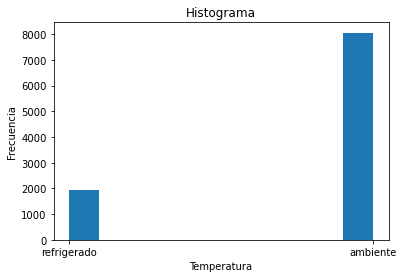

In [10]:
arr = np.array(df['temperatura'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Temperatura')
plt.title('Histograma')
plt.show()

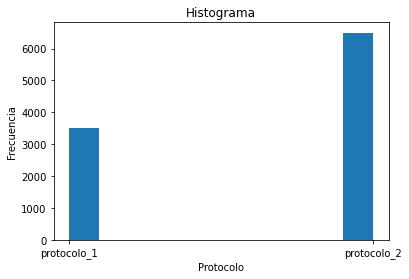

In [11]:
arr = np.array(df['protocolo'])

plt.hist(arr)
plt.ylabel('Frecuencia')
plt.xlabel('Protocolo')
plt.title('Histograma')
plt.show()